<h1>Specsavers Mailing</h1>

This Jupyter notebook uses Python to clean the datasets, join them, carry out some initial analyse and parse out a file for use in Tableau for further analysis.
We will also set out our hypothesese to test the success of mailing, and use Python statistical libraries to run the test.

In [151]:
#Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
import plotly.graph_objects as go
from scipy.stats import chi2_contingency

In [4]:
#Load data
mailings = pd.read_csv("Mailings.csv", index_col=False)
sight_tests = pd.read_csv("Sight Tests.csv", index_col=False)

In [5]:
#Clean Mailings data
mailings.head()

,Customer Number,Mailing Date,Gender,Control,Ageband,Segment
0,2339,2021-01-27,1,0,Adults,Group A
1,2555,2021-01-27,0,0,Adults,Group A
2,3156,2021-01-27,1,1,Adults,Group A
3,3171,2021-01-27,0,0,Adults,Group A
4,3637,2021-01-27,0,0,Adults,Group A


In [10]:
mailings.shape

(36093, 6)

In [16]:
#Check for duplicates
mailings.duplicated().value_counts()

False    36090
True         3
dtype: int64

In [43]:
mailings[mailings.duplicated(keep=False)]

,Customer Number,Mailing Date,Gender,Control,Ageband,Segment
15679,62172,2021-01-27,1,0,Adults,Group A
15680,62172,2021-01-27,1,0,Adults,Group A
15686,62256,2021-01-27,0,0,Adults,Group A
15687,62256,2021-01-27,0,0,Adults,Group A
21176,62380,2021-01-27,1,0,Adults,Group B
21177,62380,2021-01-27,1,0,Adults,Group B


In [52]:
#Drop duplicates on customer number
mailings = mailings.drop_duplicates(subset = ["Customer Number"])
#Check 3 were dropped
mailings.shape

(36090, 6)

In [95]:
#Check for any empty values
pd.isnull(mailings).sum()

Customer Number    0
Mailing Date       0
Gender             0
Control            0
Ageband            0
Segment            0
dtype: int64

In [6]:
#Clean sight tests data
sight_tests.head()

,Customer Number,testdate,Spend
0,1001,2021-02-17,NaN
1,1003,2021-02-10,NaN
2,1008,2021-02-25,NaN
3,1009,2021-01-27,NaN
4,1010,2021-01-30,NaN


In [54]:
sight_tests.shape

(17120, 3)

In [55]:
sight_tests.duplicated().value_counts()

False    17120
dtype: int64

In [96]:
#Check for any empty values
pd.isnull(sight_tests).sum()

Customer Number       0
testdate              0
Spend              1728
dtype: int64

In [163]:
#Need to merge files on Customer Number
#Before merging, check data types for the merging column are the same.

print(mailings.info(), sight_tests.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36090 entries, 0 to 36092
Data columns (total 6 columns):
Customer Number    36090 non-null int64
Mailing Date       36090 non-null object
Gender             36090 non-null int64
Control            36090 non-null int64
Ageband            36090 non-null object
Segment            36090 non-null object
dtypes: int64(3), object(3)
memory usage: 1.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17120 entries, 0 to 17119
Data columns (total 3 columns):
Customer Number    17120 non-null int64
testdate           17120 non-null object
Spend              15392 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 401.4+ KB
None None


In [ ]:
df = pd.merge(mailings, sight_tests) #This merges on any common column

In [107]:
df.head()

,Customer Number,Mailing Date,Gender,Control,Ageband,Segment,testdate,Spend
0,4156,2021-01-27,1,0,Adults,Group A,2021-02-17,161.0
1,4267,2021-01-27,0,0,Adults,Group A,2021-02-10,367.0
2,4347,2021-01-27,0,0,Adults,Group A,2021-02-19,149.0
3,4453,2021-01-27,1,0,Adults,Group A,2021-02-23,89.0
4,4690,2021-01-27,1,0,Adults,Group A,2021-02-16,169.0


In [112]:
df.shape

(2153, 8)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2152
Data columns (total 8 columns):
Customer Number    2153 non-null int64
Mailing Date       2153 non-null object
Gender             2153 non-null int64
Control            2153 non-null int64
Ageband            2153 non-null object
Segment            2153 non-null object
testdate           2153 non-null object
Spend              2083 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 151.4+ KB


In [114]:
pd.isnull(df).sum()

Customer Number     0
Mailing Date        0
Gender              0
Control             0
Ageband             0
Segment             0
testdate            0
Spend              70
dtype: int64

70 customers that didn't spend anything.

In [164]:
#Output this file to use in Tableau
df.to_csv("Specsavers.csv")

<h2>Analysis</h2>

Now it's time to analyse the data. We have done some preliminary analysis here, which has then been further analysed in Tableau.

In [165]:
#Examine the data to see a bit more about the other columns
agebands = df.Ageband.unique()
segments = df.Segment.unique()
genders = df.Gender.unique()
print(agebands, segments, genders)

['Adults' 'Kids' '60+'] ['Group A' 'Group B' 'Group C'] [1 0 2]


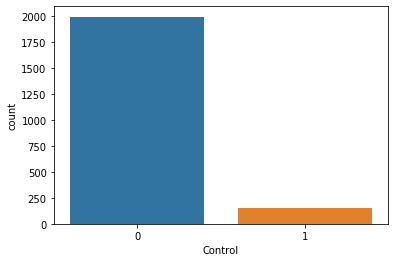

In [129]:
sns.countplot(df.Control)

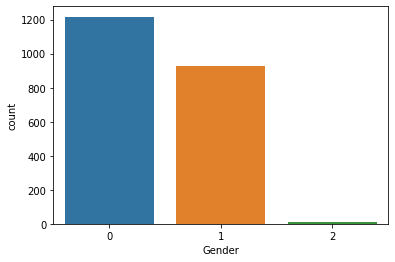

In [130]:
sns.countplot(df.Gender)

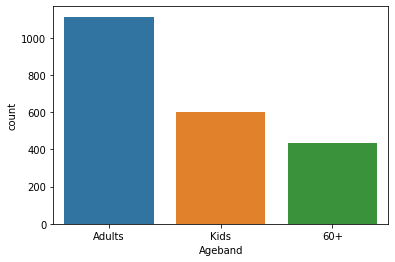

In [132]:
sns.countplot(df.Ageband)

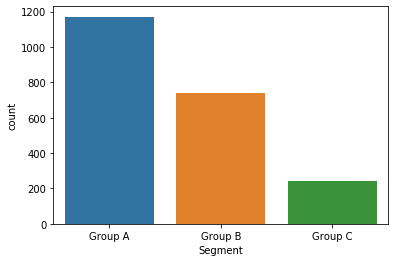

In [133]:
sns.countplot(df.Segment)

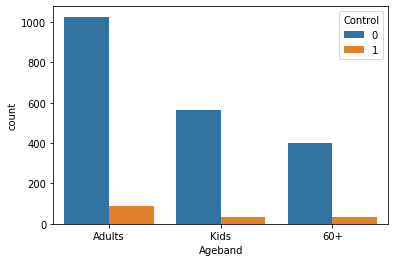

In [134]:
sns.countplot(hue = 'Control', x = 'Ageband', data = df)

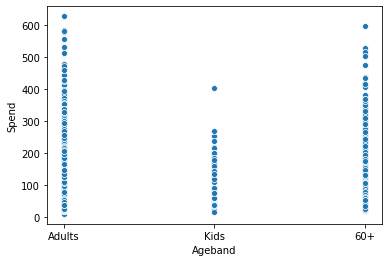

In [135]:
sns.scatterplot(x = 'Ageband', y = 'Spend', data = df)

<h2> Tableau Analysis</h2>


Further, in depth analysis can be seen in the [Tableau dashboard here](https://public.tableau.com/app/profile/vajiha/viz/SpecsaversTask/Dashboard1?publish=yes).

<h2> Statistical testing of mailing</h2>

Our Hypothesese for the test are:

H0: Sending a mailing to customers with overdue sight tests will not result in a statistically significant uplift
of sight tests

H1: Sending a mailing to customers with overdue sight tests results in a statistically significant uplift
of sight tests

We will test this at a 5% significance level.

Let's first look at the control group vs the test group.

In [153]:
control_or_mailing_group = mailings['Control'].value_counts()
control_or_mailing_group

0    32481
1     3609
Name: Control, dtype: int64

32,481 customers were included as part of the mailing, with a 3,609 control group.

In [193]:
#How many from each control/mailing group went on to have a sight test
conversion_sight_tests = df['Control'].value_counts()
conversion_sight_tests

0    1996
1     157
Name: Control, dtype: int64

157 customers from the control sample went on to have a sight test. Leaving 1,996 from the mailing list group who went on to have a sight test.

In [158]:
#Find conversion rates for test and control group
conversion_sight_tests/control_or_mailing_group

0    0.061451
1    0.043502
Name: Control, dtype: float64

The test group had a 6.1% conversion rate, compared with a 4.3% conversion rate for the control sample. The absolute difference in conversion rates, is 1.8%. This already looks as though there is some difference between the control and test. Let's look at some more details conversion rates.

In [227]:
#Calcultaing conversion rates for different demographics
#Filter out only test group
mailings_testgroup = mailings[mailings["Control"]==0]
df_testgroup = df[df["Control"] ==0]

#Gender
mailings_genders = mailings_testgroup["Gender"].value_counts()
df_genders = df_testgroup["Gender"].value_counts()
gender_conversion = df_genders/mailings_genders
gender_conversion

0    0.066111
1    0.056332
2    0.055556
3         NaN
Name: Gender, dtype: float64

In [228]:
#Age
mailings_age = mailings_testgroup["Ageband"].value_counts()
df_age = df_testgroup["Ageband"].value_counts()
age_conversion = (df_age/mailings_age)
age_conversion

60+       0.062355
Adults    0.048414
Kids      0.117794
Name: Ageband, dtype: float64

In [229]:
#Segment
mailings_segment = mailings_testgroup["Segment"].value_counts()
df_segment = df_testgroup["Segment"].value_counts()
segment_conversion = (df_segment/mailings_segment)
segment_conversion

Group A    0.059976
Group B    0.065478
Group C    0.057501
Name: Segment, dtype: float64

<h2>Chi-squared Test</h2>
To test for significance.

In [161]:
#We will use a Chi Squared test to test our hypothesese, as we are dealing with qualitative, binary data.
#First we need to map out our contingency table of values

contingency = [[32481,1996],[3609,157]]
contingency

[[32481, 1996], [3609, 157]]

In [162]:
#Run our chi squared test from Python stats library
chi2, pval, dof, expected = chi2_contingency(contingency)
chi2, pval

(16.47753865790466, 4.9229854498778944e-05)

As the p value is <0.05, we reject the null hypothesis at a 5% significance level. We can therefore say with 95% confidence, that the mailing did increase uplift of sight tests.
